In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"qasmovdyant","key":"4d4759066dca189587bcac8981b34740"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
 lakshaymiddha/crack-segmentation-dataset

Dataset URL: https://www.kaggle.com/datasets/lakshaymiddha/crack-segmentation-dataset
License(s): unknown


In [ ]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/databyhuseyn/DeepLearning/refs/heads/main/helper_functions.py

--2025-04-21 07:24:25--  https://raw.githubusercontent.com/databyhuseyn/DeepLearning/refs/heads/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2025-04-21 07:24:25 (19.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import plot_loss_curves, unzip_data

In [ ]:
unzip_data('/content/crack-segmentation-dataset.zip')

In [ ]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 8

train_images_dir = '/content/crack_segmentation_dataset/train/images'
train_masks_dir = '/content/crack_segmentation_dataset/train/masks'
test_images_dir = '/content/crack_segmentation_dataset/test/images'
test_masks_dir = '/content/crack_segmentation_dataset/test/masks'

In [ ]:
def load_data(image_dir, mask_dir, img_size):
    images, masks = [], []

    # Loop over images and masks
    for filename in os.listdir(image_dir):
        # Load image
        img = load_img(os.path.join(image_dir, filename), target_size=img_size)
        img = img_to_array(img) / 255.0  # Normalize to [0,1]
        images.append(img)

        # Load corresponding mask
        mask = load_img(os.path.join(mask_dir, filename), target_size=img_size, color_mode="grayscale")
        mask = img_to_array(mask) / 255.0  # Normalize to [0,1]
        masks.append(mask)

    return np.array(images), np.array(masks)

In [ ]:
# Load train and test data
X_train, y_train = load_data(
    train_images_dir,
    train_masks_dir,
    IMG_SIZE
)

X_test, y_test = load_data(
    test_images_dir,
    test_masks_dir,
    IMG_SIZE
)

print(f'Train images shape: {X_train.shape}, Train masks shape: {y_train.shape}')
print(f'Test images shape: {X_test.shape}, Test masks shape: {y_test.shape}')

Train images shape: (9603, 128, 128, 3), Train masks shape: (9603, 128, 128, 1)
Test images shape: (1695, 128, 128, 3), Test masks shape: (1695, 128, 128, 1)


In [ ]:
  plt.subplot??

In [ ]:
# Define paths
train_images_dir = '/content/crack_segmentation_dataset/train/images'
train_masks_dir = '/content/crack_segmentation_dataset/train/masks'

In [ ]:
# Get list of images and masks
image_files = os.listdir(train_images_dir)

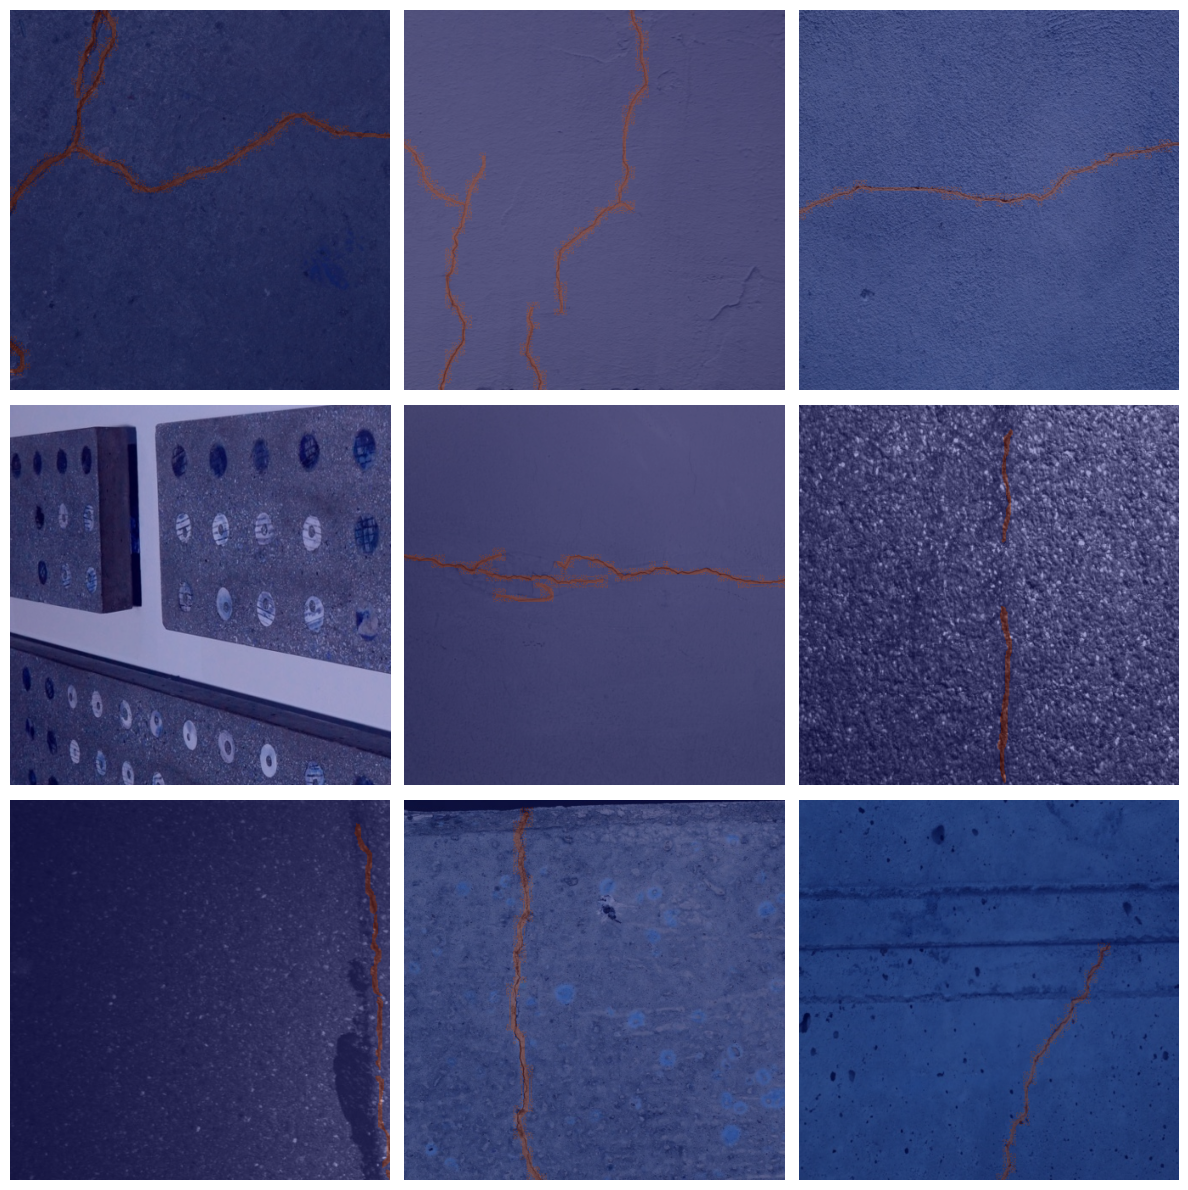

In [ ]:
# Set up the 3x3 grid for images and masks
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

for i in range(9):
    # Randomly select an image/mask pair
    n = np.random.randint(len(image_files))
    image_path = os.path.join(train_images_dir, image_files[n])
    mask_path = os.path.join(train_masks_dir, image_files[n])  # Assuming filenames are the same

    # Load the image and mask
    img = plt.imread(image_path)
    mask = plt.imread(mask_path)

    # Plot the image and mask side by side
    ax = axes[i // 3, i % 3]  # Find the right subplot
    ax.imshow(img, cmap='gray')  # Show image
    ax.imshow(mask, cmap='jet', alpha=0.35)  # Overlay mask with transparency

    ax.axis('off')  # Hide axes

# Display the grid of images
plt.tight_layout()
plt.show()


In [ ]:
tf.keras.backend.clear_session()


In [ ]:
from tensorflow.keras import layers, models

# Giriş qatını müəyyən edirik
input_layer = tf.keras.Input(shape=(128, 128, 3))  # 256x256 şəkil, 3 kanal (RGB)

# Bir neçə konvolusiya qatını əlavə edirik
conv2d_1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
conv2d_2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv2d_1)
conv2d_3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv2d_2)

# Sadə konvolusiya ilə çıxış qatını təyin edirik
outputs = layers.Conv2D(filters=1, kernel_size=(1, 1), activation='sigmoid')(conv2d_3)

# Modeli yaratmaq
model = models.Model(inputs=input_layer, outputs=outputs)

# Modelin özetini yoxlamaq
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 1)    │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,377 (364.75 KB)

 Trainable params: 93,377 (364.75 KB)

 Non-trainable params: 0 (0.00 B)

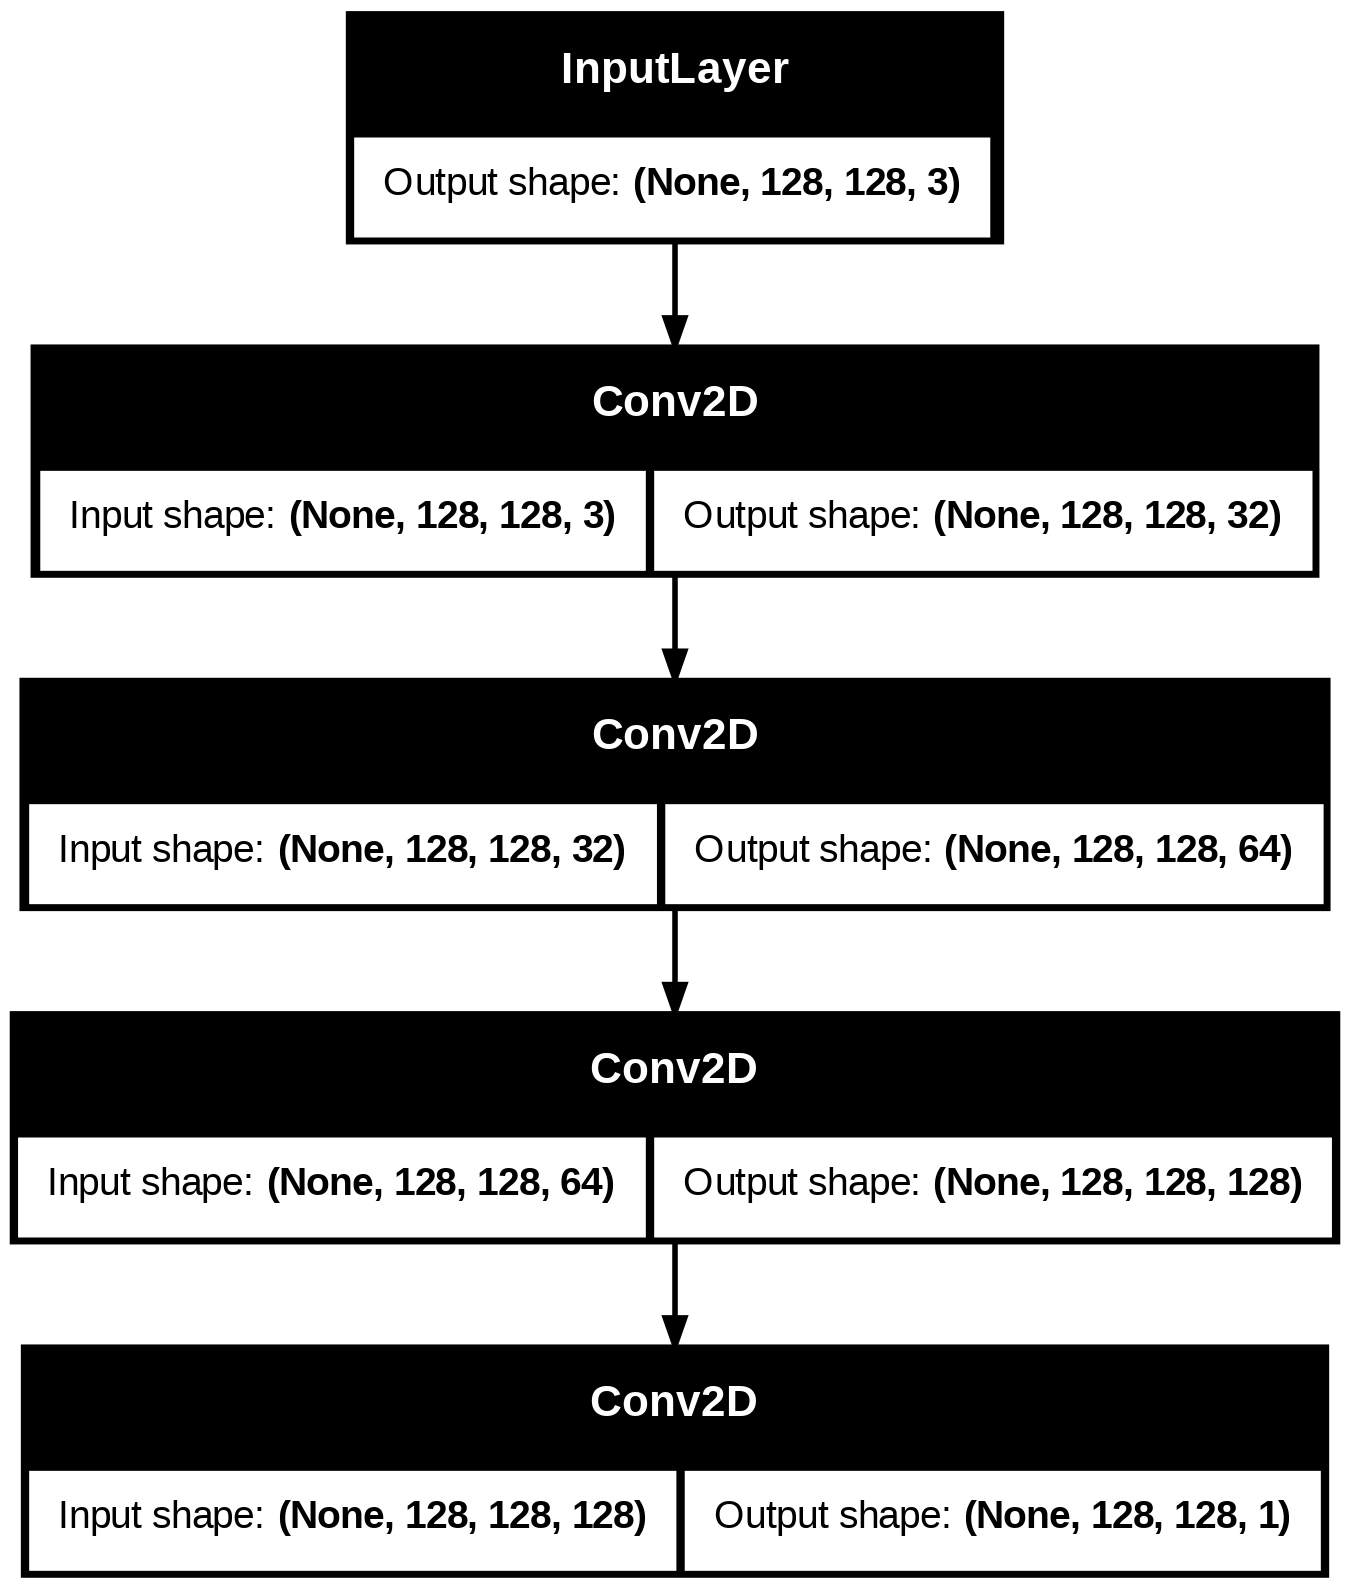

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# Add model checkpoint and early stopping
model_ckp = tf.keras.callbacks.ModelCheckpoint('/content/model.png.weights.h5',
                                               save_best_only=True,
                                               save_weights_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(restore_best_weights=True,
                                                  patience=3)

In [ ]:
model.compile(loss='binary_crossentropy',
                   optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                   metrics=['accuracy'])

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

def image_mask_generator(image_dir, mask_dir, batch_size, image_size=(128, 128), seed=42):
    image_datagen = ImageDataGenerator(rescale=1./255)
    mask_datagen = ImageDataGenerator()

    image_generator = image_datagen.flow_from_directory(
        image_dir,
        classes=['.'],
        class_mode=None,
        color_mode='rgb',
        target_size=image_size,
        batch_size=batch_size,
        seed=seed
    )

    mask_generator = mask_datagen.flow_from_directory(
        mask_dir,
        classes=['.'],
        class_mode=None,
        color_mode='grayscale',
        target_size=image_size,
        batch_size=batch_size,
        seed=seed
    )

    while True:
        imgs = next(image_generator)   # düzəliş burdadır
        masks = next(mask_generator)
        yield imgs, masks


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_test, y_test),
                    callbacks=[model_ckp, early_stopping],
                    batch_size=16)

Epoch 1/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 38s 50ms/step - accuracy: 0.9585 - loss: 0.1486 - val_accuracy: 0.9593 - val_loss: 0.1188
Epoch 2/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.9598 - loss: 0.1183 - val_accuracy: 0.9606 - val_loss: 0.1189
Epoch 3/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 42s 40ms/step - accuracy: 0.9605 - loss: 0.1144 - val_accuracy: 0.9598 - val_loss: 0.1151
Epoch 4/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.9612 - loss: 0.1104 - val_accuracy: 0.9619 - val_loss: 0.1065
Epoch 5/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.9621 - loss: 0.1053 - val_accuracy: 0.9619 - val_loss: 0.1014
Epoch 6/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.9614 - loss: 0.1039 - val_accuracy: 0.9622 - val_loss: 0.1003
Epoch 7/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.9625 - loss: 0.1006 - val_accuracy: 0.9626 - val_loss: 0.0978
Epoch 8/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 25s 42ms/step - accuracy: 0.9620 - loss: 0.1016 - 

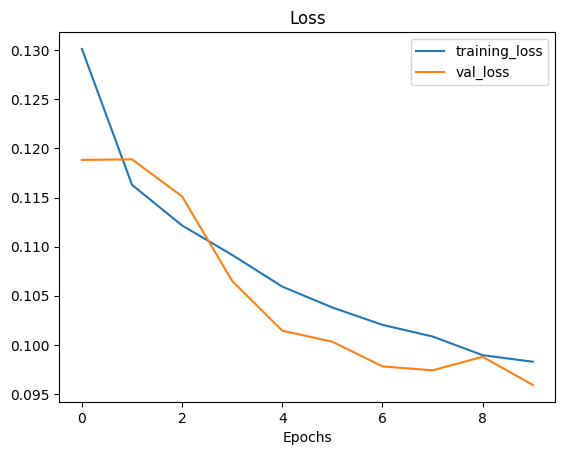

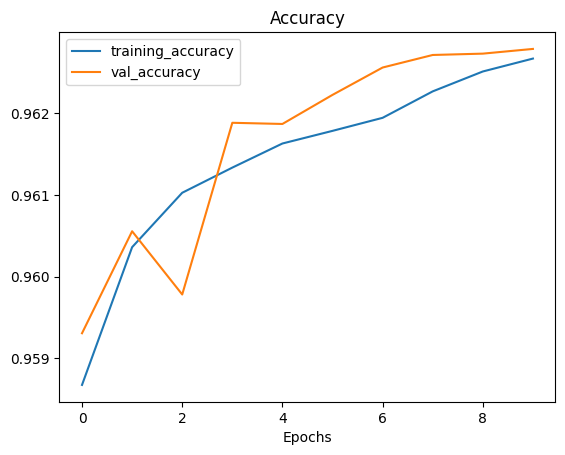

In [ ]:
plot_loss_curves(history)

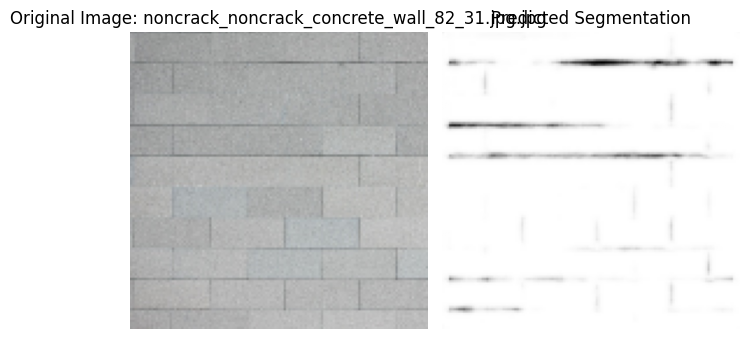

In [ ]:
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array

image_dir = '/content/crack_segmentation_dataset/images/'
random_image = random.choice(os.listdir(image_dir))

img_path = os.path.join(image_dir, random_image)
img = img_to_array(load_img(img_path, target_size=(128, 128))) / 255.0

pred = model(tf.expand_dims(img, axis=0))
plt.subplot(121)
plt.imshow(img)
plt.title(f'Original Image: {random_image}')
plt.axis('off')
plt.subplot(122)
plt.imshow(tf.squeeze(pred), cmap='binary')
plt.title('Predicted Segmentation')
plt.axis('off')
plt.tight_layout()
plt.show()
